In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [6]:
fileA = "Dataset_No1/room_climate-location_A-measurement04.csv"
fileB = "Dataset_No1/room_climate-location_A-measurement05.csv"

dfA = pd.read_csv(fileA, header=None)
dfB = pd.read_csv(fileB, header=None)

df = pd.concat([dfA, dfB], ignore_index=True)

df.columns = [
    "idx", "timestamp", "s1", "s2",
    "temperature", "humidity", "light1", "light2",
    "extra1", "extra2", "extra3", "extra4"
]

df = df[["temperature","humidity","light1","light2"]]
df.head()

,temperature,humidity,light1,light2
0,21.24,43.426,192.86,556.6
1,21.29,42.332,221.43,731.4
2,20.90,45.086,185.71,524.4
3,20.89,41.279,201.43,588.8
4,21.24,43.426,190.00,556.6


In [7]:
df["temp_next"] = df["temperature"].shift(-1)
df = df.dropna()

In [8]:
features = df[["temperature","humidity","light1","light2"]].values
labels   = df["temp_next"].values.reshape(-1,1)

scalerX = MinMaxScaler()
scalery = MinMaxScaler()

X_scaled = scalerX.fit_transform(features)
y_scaled = scalery.fit_transform(labels)

# Split 70/15/15
n = len(X_scaled)
train_end = int(n*0.7)
val_end   = int(n*0.85)

X_train, y_train = X_scaled[:train_end], y_scaled[:train_end]
X_val,   y_val   = X_scaled[train_end:val_end], y_scaled[train_end:val_end]
X_test,  y_test  = X_scaled[val_end:], y_scaled[val_end:]

In [9]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

model.summary()

e:\PythonDeep\environments\deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0771 - mae: 0.2262 - val_loss: 0.0534 - val_mae: 0.2121
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0608 - mae: 0.2045 - val_loss: 0.0474 - val_mae: 0.2062
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0588 - mae: 0.2020 - val_loss: 0.0503 - val_mae: 0.2019
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0569 - mae: 0.1990 - val_loss: 0.0469 - val_mae: 0.1978
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0554 - mae: 0.1969 - val_loss: 0.0498 - val_mae: 0.1979
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0545 - mae: 0.1962 - val_loss: 0.0462 - val_mae: 0.1963
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0535 - mae: 0.1944 - val_loss: 0.0514 - val_mae: 0.2002
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0524 - mae: 0.1940 - val_loss: 0.0520 - val_mae: 0.1955
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

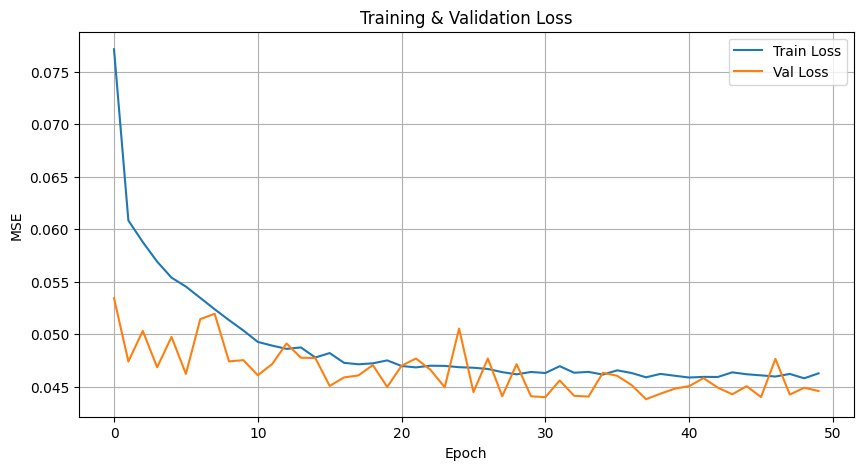

In [11]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
y_pred_scaled = model.predict(X_test)
y_pred = scalery.inverse_transform(y_pred_scaled)
y_true = scalery.inverse_transform(y_test)

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print("Test MSE:", mse)
print("Test MAE:", mae)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test MSE: 0.05325954913882701
Test MAE: 0.21194117177831062


e:\PythonDeep\environments\deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


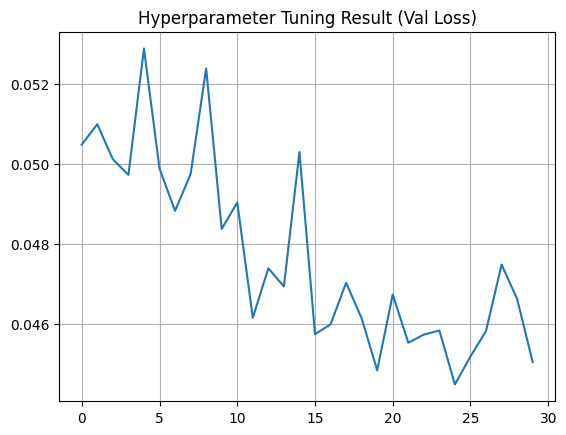

In [13]:
def build_model(h1=64, h2=32, lr=0.001):
    model = models.Sequential([
        layers.Dense(h1, activation='relu', input_shape=(4,)),
        layers.Dense(h2, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss="mse")
    return model

test_model = build_model(h1=128, h2=64, lr=0.0005)
test_hist = test_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=0
)

plt.plot(test_hist.history['val_loss'])
plt.title("Hyperparameter Tuning Result (Val Loss)")
plt.grid(True)
plt.show()
